# ANALYSIS OF IMMUNE RESPONSE TO HEPATITUS B

The progression of the Hepatitus B viron infection is modelled in detail in "Mathematical model of immune response to hepatitis B
Author links open overlay panelF". Fatehi Chenar, Y.N. Kyrychko, K.B. Blyuss in the Journal of Theorectical Biology, June, 2018. The model involves several cell types with complex interactions between them. A key element of the model is that **refractory cells (R)** (cells that are resistant to Hepatitus B) increase in number during the course of the infection and following it. Here, the level of R cells can be explained by the number of CD8+ effector cells (``E``) Cells.


<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0022519318301395-gr1_lrg.jpg"
     alt="Markdown Monster icon" 
     width="800" height="1000"
     style="float: left; margin-right: 10px;" />

In [1]:
from controlSBML import ControlSBML

import control
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Problem Statement

The biological problem we address is to show that ``R`` cells can be effectively regulated by ``E`` cells. That is, given a setpoint for ``R`` cells, we can addjust the level of ``E`` cells to achieve that setpoint.
* Regulate ``R`` to a setpoint
* Avoid oscillations

# 2. System Definition

A system is defined by its inputs, outputs, and operating point. The latter refers to the range of inputs over which the system operates.

Here is a plot of the floating species.

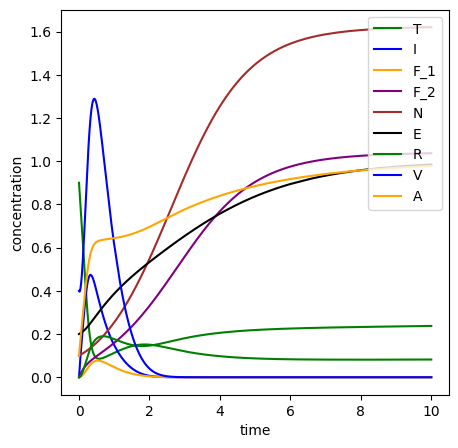

In [2]:
URL = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1911110001/4/FatehiChenar2018.xml"
INPUT_NAME = "E"
OUTPUT_NAME = "R"
CTLSB = ControlSBML(URL, figsize=(5, 5), times=np.linspace(0, 10, 1000), markers=False,
                   save_path="data.csv", input_names=[INPUT_NAME], output_names=[OUTPUT_NAME])  # Specify default value of options
_ = CTLSB.plotModel(figsize=(5,5), times=np.linspace(0, 10, 1000), markers=False, is_fixed_input_species=True)

<Axes: xlabel='miliseconds'>

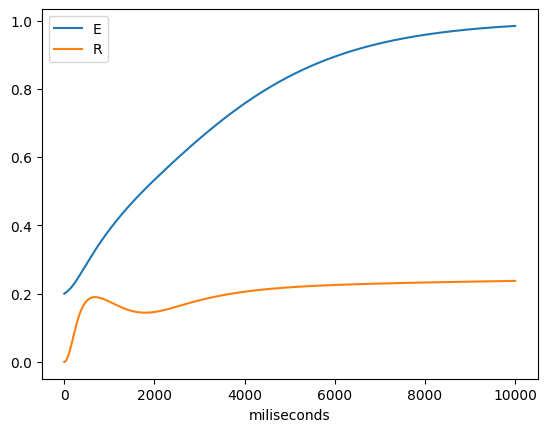

In [3]:
ts = CTLSB.plotModel(is_plot=False)
df = ts[[INPUT_NAME, OUTPUT_NAME]]
df.plot()

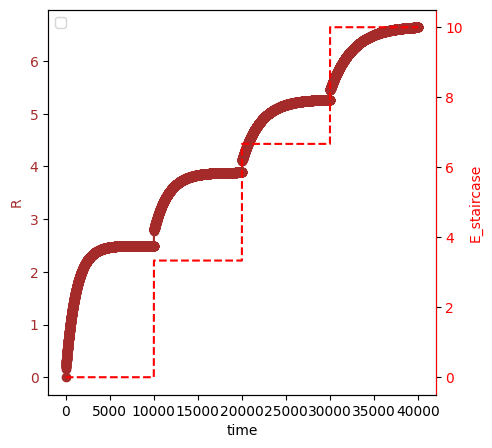

In [4]:
TIMES = np.linspace(0, 40000, 10000)
_ = CTLSB.plotStaircaseResponse(initial_value=0, num_step=3, final_value=10, times=TIMES)

# 3. System Identification

System identification describes the system as a transfer function for the operating point specified in system definition. In our system, the input is ``pIRS`` and the output is ``pmTORC1``. ``pIRS`` is varied over the operating region of [20, 25]. The method ``plotTransferFunctionFit`` estimates to transfer function and plots the fit. It returns a Timeseries (a dataframe with the data plotted) and an AntimonyBuilder (the Antimony code run to produce the fitting data).

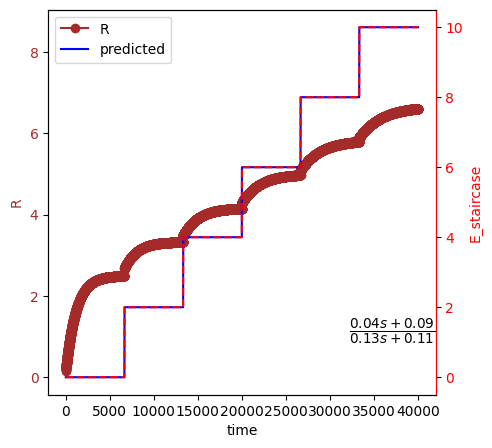

In [5]:
_ = CTLSB.plotTransferFunctionFit(num_numerator=2, num_denominator=3, initial_value=0, final_value=10,
                                   times=TIMES)

We can obtain the transfer function object.

In [6]:
TRANSFER_FUNCTION = CTLSB.getOpenLoopTransferFunction()
TRANSFER_FUNCTION

TransferFunction(array([0.03828729, 0.09239841]), array([0.13489993, 0.10725159]))

In [7]:
TRANSFER_FUNCTION.poles(), TRANSFER_FUNCTION.zeros()

(array([-0.79504556+0.j]), array([-2.41329179+0.j]))

This suggests that all closed loop poles are real and the branch from -0.795 to -2.4132. Thus, a high gain proportional controller will be stable and unbiased.

In [8]:
TRANSFER_FUNCTION.bandwidth()

0.8960990303848614

# 4. Testbed Construction and Design

The nature of this system greatly simplifies design. First, we analyze the root locus plot. The is one pole and one zero. We see that a proportional controller is always stable and non-oscillating.

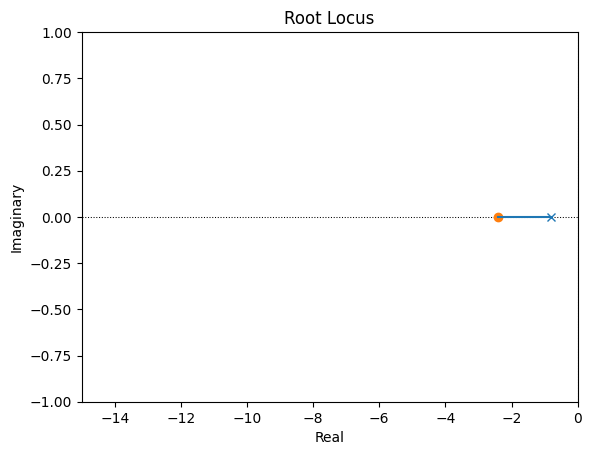

In [9]:
_ = control.rlocus(TRANSFER_FUNCTION, xlim=[-15, 0], grid=False)

Now, we analyze the settling times for different setpoints and gains.

> /Users/jlheller/home/Technical/repos/controlSBML/src/controlSBML/sbml_system.py(442)simulateSISOClosedLoop()
    440         import pdb; pdb.set_trace()
    441         # Run the simulation
--> 442         result = self._simulate(start_time, end_time, num_point, is_steady_state=is_steady_state,
    443                             antimony_builder=builder, is_reload=True), builder
    444         return result



ipdb>  c


> /Users/jlheller/home/Technical/repos/controlSBML/src/controlSBML/sbml_system.py(442)simulateSISOClosedLoop()
    440         import pdb; pdb.set_trace()
    441         # Run the simulation
--> 442         result = self._simulate(start_time, end_time, num_point, is_steady_state=is_steady_state,
    443                             antimony_builder=builder, is_reload=True), builder
    444         return result



ipdb>  exit


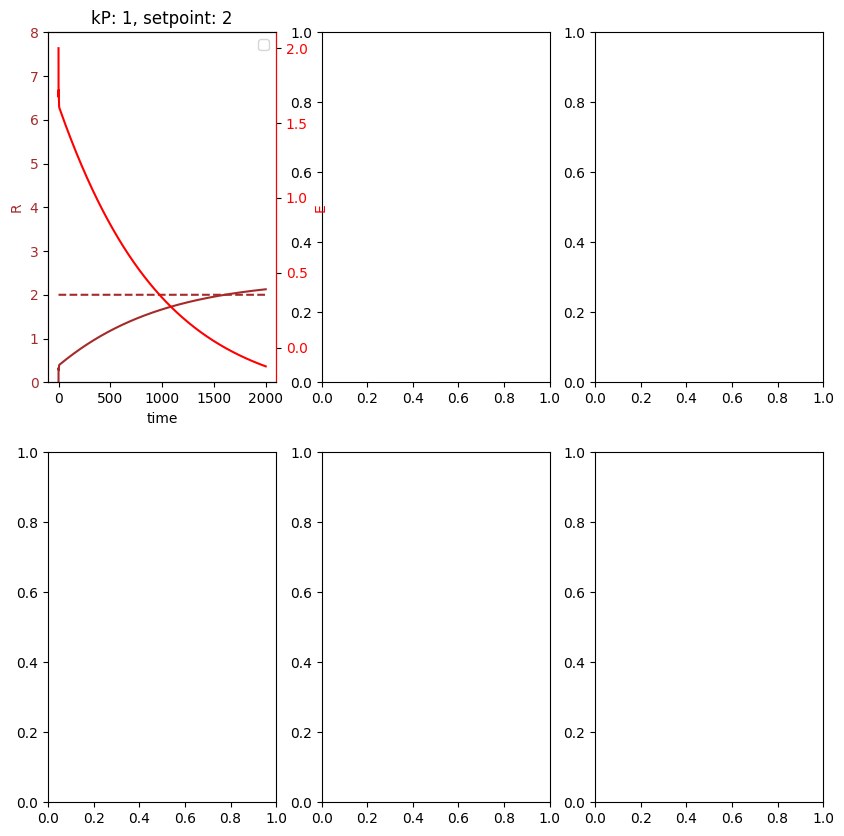

In [10]:
TIMES = np.linspace(0, 2000, 40000)
_, axes = plt.subplots(2, 3)
irow = -1
for kP in [1, 1000]:
    irow += 1
    icol = -1
    for setpoint in [2, 4, 6]:
        icol += 1
        ts, builder = CTLSB.plotClosedLoop(setpoint=setpoint, kP=kP, kF=None, figsize=(10, 10),
                                           times=TIMES, ylim=[0, 8], title="kP: %d, setpoint: %d" % (kP, setpoint), ax=axes[irow, icol],
                                          is_plot=False)
plt.show()

In [ ]:
builder